In [7]:
# %load ../common_imports.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from jlam.py_sql import PySql
import jlam.conn_constants as cnst
%matplotlib inline

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core import debugger as dbg

%load_ext autoreload
%autoreload 2

# usage pandas_profiling.ProfileReport(df)
#import pandas_profiling ;

#bidata = PySql(cnst.SVR_BIEDW,cnst.DB_BI_DATA)
#biops = PySql(cnst.SVR_BIEDW,cnst.DB_BI_OPERATIONAL)

In [3]:
from importlib import reload

In [2]:
import friendship as fs

In [4]:
reload(fs)

<module 'friendship' from '/Users/i846240/projects/ds_from_scratch/friendship.py'>

In [12]:
sandt = fs.salaries_and_tenures
sandt

[(83000, 8.7),
 (88000, 8.1),
 (48000, 0.7),
 (76000, 6),
 (69000, 6.5),
 (76000, 7.5),
 (60000, 2.5),
 (83000, 10),
 (48000, 1.9),
 (63000, 4.2)]

In [20]:
y=[sandt[i][0] for i in range(len(sandt))]
x=[sandt[i][1] for i in range(len(sandt))]

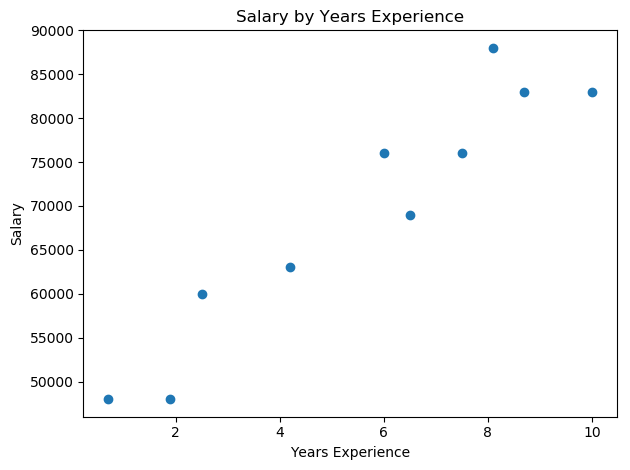

In [109]:

fig,ax = plt.subplots()
ax.scatter(x=x,y=y)
ax.set_ylabel('Salary')
ax.set_xlabel('Years Experience')
ax.set_title('Salary by Years Experience')
fig.tight_layout()

In [108]:
np.sum(y)/len(y)

69400.0

### Get average salary

In [30]:
from collections import defaultdict

In [33]:
# keys are years, values are lists of the salaries for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in sandt:
    salary_by_tenure[tenure].append(salary)
    
print(salary_by_tenure)

defaultdict(<class 'list'>, {8.7: [83000], 8.1: [88000], 0.7: [48000], 6: [76000], 6.5: [69000], 7.5: [76000], 2.5: [60000], 10: [83000], 1.9: [48000], 4.2: [63000]})


In [76]:
def bucket_tenure(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"
    

In [77]:
salary_by_tenure_bucket = defaultdict(list)

In [78]:
for salary, tenure in sandt:
    tenure_bucket = bucket_tenure(tenure)
    salary_by_tenure_bucket[tenure_bucket].append(salary)

In [87]:
salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

In [88]:
avg_salary_by_bucket = {
    bucket : np.sum(salaries)/len(salaries)
    for bucket, salaries in salary_by_tenure_bucket.items()
}

In [89]:
avg_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

In [90]:
def plot_hbar(plt,y_cat,x_val,title,xlabel,ylabel):
    plt.rcdefaults()
    fig, ax = plt.subplots()
    
    ax.barh(y_cat,x_val)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    plt.show()

In [91]:
buckets=list(avg_salary_by_bucket.keys())
avg = list(avg_salary_by_bucket.values())


In [92]:
import jlam.matplotlib_util as mpu

<Figure size 500x500 with 0 Axes>

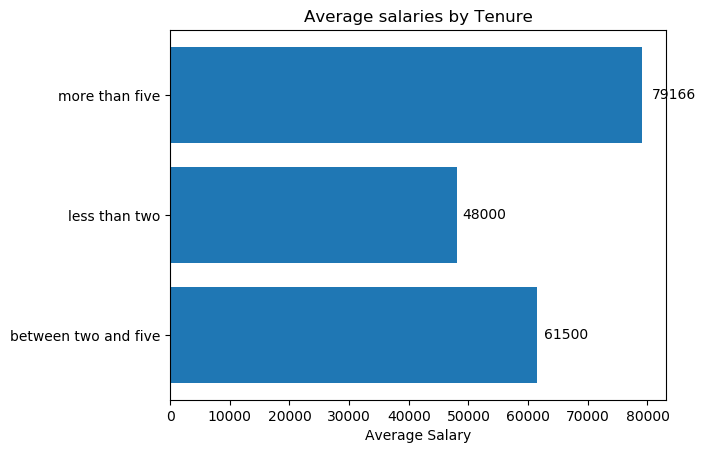

In [94]:
mpu.draw_barh(plt,buckets,avg,'Average salaries by Tenure','Average Salary',(5,5));